<h1>Kaggle Competition Classification</h1>
<h3>-Aaryansh Sahay</h3>
<br><br>
<h2>Importing Libraries</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [13]:
from sklearn.metrics import roc_auc_score,f1_score

from sklearn.preprocessing import StandardScaler 

from sklearn.model_selection import train_test_split,GridSearchCV

<h2>Data Preprocessing</h2>

In [18]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
train.head()

,id,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,16330,138.835938,45.453922,-0.096961,0.086516,3.082776,18.529846,7.179262,60.660346,0
1,5999,130.296875,51.969546,-0.005585,-0.295680,4.299331,23.557530,6.883942,52.337106,0
2,10228,127.328125,55.471714,0.090976,-0.444422,69.913880,73.240545,0.434744,-1.249027,0
3,2980,102.453125,44.412987,0.652927,1.101361,2.425585,15.501871,9.213629,106.097405,0
4,2472,104.921875,41.629431,0.189677,0.725700,3.275084,18.661805,7.389537,65.169692,0


In [19]:
col_names=['id','V1','V2','V3','V4','V5','V6','V7','V8','target_class']
train.columns=col_names
test.columns=col_names[:-1]
train.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,target_class
0,16330,138.835938,45.453922,-0.096961,0.086516,3.082776,18.529846,7.179262,60.660346,0
1,5999,130.296875,51.969546,-0.005585,-0.295680,4.299331,23.557530,6.883942,52.337106,0
2,10228,127.328125,55.471714,0.090976,-0.444422,69.913880,73.240545,0.434744,-1.249027,0
3,2980,102.453125,44.412987,0.652927,1.101361,2.425585,15.501871,9.213629,106.097405,0
4,2472,104.921875,41.629431,0.189677,0.725700,3.275084,18.661805,7.389537,65.169692,0


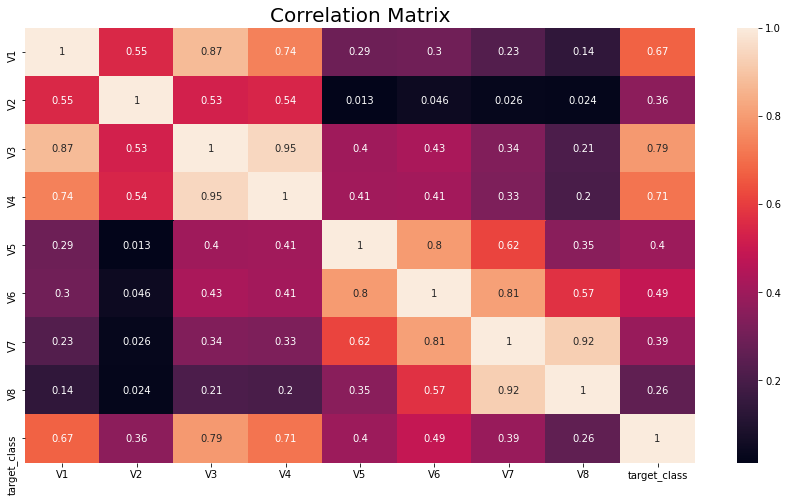

In [20]:
corr_mat=train.drop('id',axis=1).corr().abs()
plt.figure(figsize=(15,8))
plt.title('Correlation Matrix',fontsize=20)
sns.heatmap(corr_mat,annot=True)
plt.show()

In [21]:
features=corr_mat['target_class']
features

V1              0.672304
V2              0.362363
V3              0.791776
V4              0.711313
V5              0.395620
V6              0.490554
V7              0.390269
V8              0.258525
target_class    1.000000
Name: target_class, dtype: float64

In [22]:
# Cannot drop features as they are all moderately correlated with the target class variable

In [23]:
X=train.drop(['id','target_class'],axis=1)
y=train['target_class']

In [24]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8
0,138.835938,45.453922,-0.096961,0.086516,3.082776,18.529846,7.179262,60.660346
1,130.296875,51.969546,-0.005585,-0.295680,4.299331,23.557530,6.883942,52.337106
2,127.328125,55.471714,0.090976,-0.444422,69.913880,73.240545,0.434744,-1.249027
3,102.453125,44.412987,0.652927,1.101361,2.425585,15.501871,9.213629,106.097405
4,104.921875,41.629431,0.189677,0.725700,3.275084,18.661805,7.389537,65.169692


In [25]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),index=X.index,columns=X.columns)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8
0,1.077831,-0.162409,-0.538424,-0.273139,-0.324579,-0.401011,-0.248940,-0.413642
1,0.745994,0.788590,-0.452896,-0.334727,-0.283539,-0.144201,-0.314079,-0.490882
2,0.630625,1.299754,-0.362516,-0.358695,1.929909,2.393568,-1.736597,-0.988160
3,-0.336046,-0.314340,0.163467,-0.109606,-0.346748,-0.555677,0.199787,0.008013
4,-0.240108,-0.720618,-0.270132,-0.170140,-0.318091,-0.394270,-0.202559,-0.371796


In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=101)

<h3>Comparing Models</h3>

In [44]:
models=['Logistic Regression','Decision Tree Classifier','Support Vector Machines']
scores_f1=[]
scores_auc=[]

In [45]:
model=LogisticRegression().fit(X_train,y_train)
y_preds=model.predict(X_test)
y_preds_proba=model.predict_proba(X_test)[:,1]
score_=roc_auc_score(y_test,y_preds_proba)
score=f1_score(y_test,y_preds)
scores_f1.append(score)
scores_auc.append(score_)

In [46]:
model=DecisionTreeClassifier().fit(X_train,y_train)
y_preds=model.predict(X_test)
y_preds_proba=model.predict_proba(X_test)[:,1]
score_=roc_auc_score(y_test,y_preds_proba)
score=f1_score(y_test,y_preds)
scores_f1.append(score)
scores_auc.append(score_)

In [47]:
model=SVC(probability=True).fit(X_train,y_train)
y_preds=model.predict(X_test)
y_preds_proba=model.predict_proba(X_test)[:,1]
score=f1_score(y_test,y_preds)
score_=roc_auc_score(y_test,y_preds_proba)
scores_f1.append(score)
scores_auc.append(score_)

In [48]:
compare={
    'Model':models,
    'F1 Score':scores_f1,
    'AUC Score':scores_auc
}

compare=pd.DataFrame(compare)
compare.sort_values(by=['AUC Score'],ascending=False)

,Model,F1 Score,AUC Score
0,Logistic Regression,0.868687,0.972426
2,Support Vector Machines,0.863291,0.958211
1,Decision Tree Classifier,0.824201,0.911606


In [49]:
# Logistic Regression And Support Vector Machines Are Appropriate.

<h3>Hyper Parameters For SVM</h3>
<br>
Since the dataset is highly imbalanced, we are setting class_weight parameter to 'balanced'

In [55]:
params={'C':[0.1,10,100,1000],'gamma':[0.1,0.01,0.001,0.0001],'kernel':['rbf','poly','sigmoid','linear'],'class_weight':['balanced']}

In [56]:
grid=GridSearchCV(SVC(),params,refit=True,verbose=2,scoring='roc_auc')
grid.fit(X,y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=poly; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=poly; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=poly; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=poly; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=poly; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=sigmoid; total time=   1.5s
[CV] END C=0.1, class_weight=balanced,

[CV] END C=10, class_weight=balanced, gamma=0.1, kernel=linear; total time=   2.1s
[CV] END C=10, class_weight=balanced, gamma=0.1, kernel=linear; total time=   1.9s
[CV] END C=10, class_weight=balanced, gamma=0.1, kernel=linear; total time=   1.9s
[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.3s
[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.5s
[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.5s
[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.5s
[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=poly; total time=   1.6s
[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=poly; total time=   1.7s
[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=poly; total time=   1.7s
[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=poly; total time=   1.5s
[CV] END C=10, cla

[CV] END C=100, class_weight=balanced, gamma=0.01, kernel=linear; total time=   6.8s
[CV] END C=100, class_weight=balanced, gamma=0.01, kernel=linear; total time=   8.7s
[CV] END C=100, class_weight=balanced, gamma=0.01, kernel=linear; total time=   8.0s
[CV] END C=100, class_weight=balanced, gamma=0.01, kernel=linear; total time=   8.3s
[CV] END C=100, class_weight=balanced, gamma=0.01, kernel=linear; total time=   8.6s
[CV] END C=100, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   1.4s
[CV] END C=100, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   1.7s
[CV] END C=100, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   1.6s
[CV] END C=100, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   1.4s
[CV] END C=100, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   1.5s
[CV] END C=100, class_weight=balanced, gamma=0.001, kernel=poly; total time=   3.2s
[CV] END C=100, class_weight=balanced, gamma=0.001, kernel=poly; total time=

[CV] END C=1000, class_weight=balanced, gamma=0.001, kernel=sigmoid; total time=   1.6s
[CV] END C=1000, class_weight=balanced, gamma=0.001, kernel=sigmoid; total time=   1.5s
[CV] END C=1000, class_weight=balanced, gamma=0.001, kernel=sigmoid; total time=   1.5s
[CV] END C=1000, class_weight=balanced, gamma=0.001, kernel=linear; total time=  42.2s
[CV] END C=1000, class_weight=balanced, gamma=0.001, kernel=linear; total time=  55.0s
[CV] END C=1000, class_weight=balanced, gamma=0.001, kernel=linear; total time=  51.5s
[CV] END C=1000, class_weight=balanced, gamma=0.001, kernel=linear; total time=  49.1s
[CV] END C=1000, class_weight=balanced, gamma=0.001, kernel=linear; total time=  57.1s
[CV] END C=1000, class_weight=balanced, gamma=0.0001, kernel=rbf; total time=   1.4s
[CV] END C=1000, class_weight=balanced, gamma=0.0001, kernel=rbf; total time=   1.6s
[CV] END C=1000, class_weight=balanced, gamma=0.0001, kernel=rbf; total time=   1.6s
[CV] END C=1000, class_weight=balanced, gamma=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 10, 100, 1000],
                         'class_weight': ['balanced'],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             scoring='roc_auc', verbose=2)

In [57]:
grid.best_params_

{'C': 100, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}

In [59]:
model=SVC(C=100,gamma=0.01,kernel='rbf',class_weight='balanced',probability=True).fit(X_train,y_train)
y_preds=model.predict(X_test)
y_preds_proba=model.predict_proba(X_test)[:,1]
print('F1 Score Of The Model Is : {}'.format(f1_score(y_test,y_preds)))
print('AUC Score Of The Model Is: {}'.format(roc_auc_score(y_test,y_preds_proba)))

F1 Score Of The Model Is : 0.8509249183895539
AUC Score Of The Model Is: 0.9748036556693541


<h2>Making Predictions</h2>

In [61]:
id_=test['id']
test=test.drop('id',axis=1)
test.head()

,V1,V2,V3,V4,V5,V6,V7,V8
0,130.960938,51.285872,0.072242,-0.584550,1.940635,13.092250,10.481509,147.756658
1,23.703125,41.677774,4.112599,16.687125,12.272575,39.323386,3.710673,14.110997
2,113.882812,45.562907,0.064720,0.243603,2.101171,13.008511,10.184925,145.275542
3,101.882812,44.301633,0.584880,0.722995,2.645485,19.539765,9.101964,90.419878
4,96.335938,43.957060,0.302221,0.693381,1.807692,16.216959,11.322475,144.368633


In [62]:
test=pd.DataFrame(scaler.fit_transform(test),index=test.index,columns=test.columns)
test.head()

,V1,V2,V3,V4,V5,V6,V7,V8
0,0.788185,0.705644,-0.386030,-0.384118,-0.358446,-0.683971,0.499650,0.438100
1,-3.446595,-0.705433,3.475376,2.488183,0.000638,0.694232,-1.041467,-0.880482
2,0.113902,-0.134850,-0.393218,-0.246395,-0.352867,-0.688370,0.432144,0.413620
3,-0.359885,-0.320084,0.103904,-0.166671,-0.333949,-0.345214,0.185650,-0.127600
4,-0.578888,-0.370690,-0.166236,-0.171596,-0.363067,-0.519796,0.691064,0.404672


In [64]:
predictions=model.predict_proba(test)[:,1]
submission={
    'id':id_,
    'target_class':predictions
}
submissions=pd.DataFrame(submission)
submissions.to_csv('submission_final.csv',index=False)

got score -> 0.96378

In [65]:
submissions.head()

,id,target_class
0,15,0.001364
1,28,0.999993
2,30,0.002531
3,35,0.037317
4,48,0.010116
